In [7]:
# Daniel Jimenez Manrique
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [8]:
# Cargar el archivo CSV
data = pd.read_csv('Social_Network_Ads.csv')
# Mostrar las primeras filas del conjunto de datos y la información general
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


(   Age  EstimatedSalary  Purchased
 0   19            19000          0
 1   35            20000          0
 2   26            43000          0
 3   27            57000          0
 4   19            76000          0,
 None)

In [9]:
# Separar las características (X) y la variable objetivo (y)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [10]:
# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Inicializar y entrenar el modelo
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
# Realizar predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular la precisión y otros parámetros de evaluación
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión del modelo:", accuracy)
print("\nReporte de Clasificación:\n", classification_rep)
print("Matriz de Confusión:\n", conf_matrix)


Precisión del modelo: 0.85

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.81      0.81      0.81        47

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120

Matriz de Confusión:
 [[64  9]
 [ 9 38]]


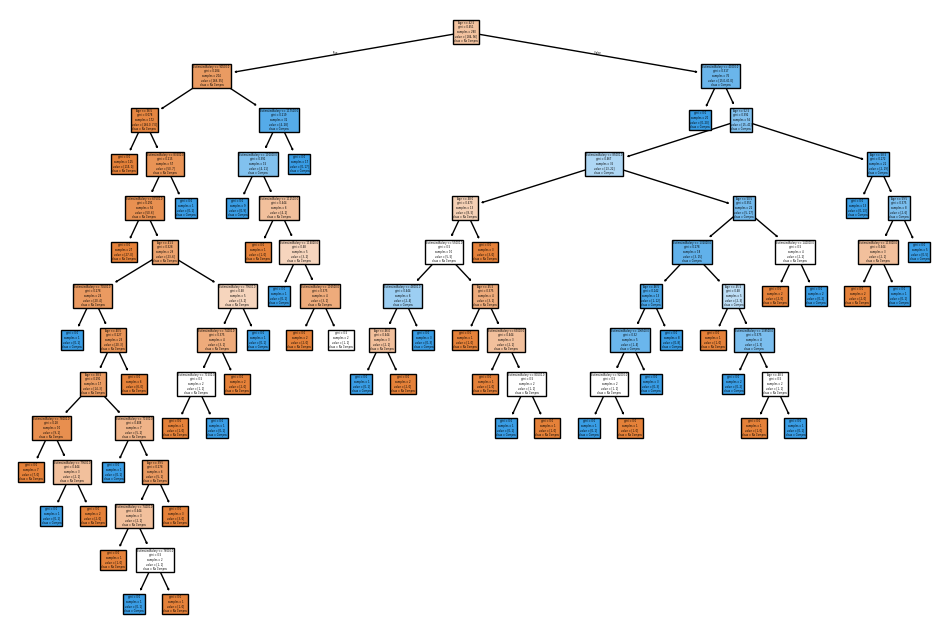

In [13]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=['Age', 'EstimatedSalary'], class_names=['No Compra', 'Compra'], filled=True)
plt.show()
